In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#2-Dimensional Array for world representation as 1 is white and 0 is black
W=[[1, 0, 0, 0, 1],
    [0, 1, 1, 0, 1],
    [1, 1, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [0, 1, 0, 1, 1]]

#2-Dimensional Array for probability that the vehicle is in the corresponding grid
#At the start all grids have the same probability
p=[[(1/25) for i in range(5)],
    [(1/25) for i in range(5)],
    [(1/25) for i in range(5)],
    [(1/25) for i in range(5)],
    [(1/25) for i in range(5)]]


In [5]:
def Sense(S, pTrue, pFalse, SensorInput):
    #Assuming the actual world as the pattern given by the 2D array called p
    if SensorInput == 'b' or SensorInput =='B':
        for i in range(5):
            for j in range(5):
                if W[i][j] == 0:
                    S[i][j] = S[i][j]*pTrue
                else:
                    S[i][j] = S[i][j]*pFalse

    elif SensorInput == 'W' or SensorInput == 'w':
        for i in range(5):
            for j in range(5):
                if W[i][j] == 0:
                    S[i][j] = S[i][j]*pFalse
                else:
                    S[i][j] = S[i][j]*pTrue
    #Now to calculate the normalizer to aquire total probability of 1
    sumOfElements = 0
    for i in range(5):
            for j in range(5):
                sumOfElements += S[i][j]
    Normalizer = 1 / sumOfElements
    for i in range(5):
            for j in range(5):
                S[i][j] = S[i][j] * Normalizer
    return S

In [6]:
#Shifting for exact motion (Accuracy 100% of motion, means no under/over shoot)
def MoveExact(InitialMatrix, Direction):
    q = [[],[],[],[],[]]
    if(Direction == 'U' or Direction =='u'): #Motion is upward
        for i in range(5):
            for j in range(5):
                q[i].append(InitialMatrix[(i+1) % (len(InitialMatrix))][j])

    elif(Direction == 'D' or Direction =='d'): #Motion is downward
        for i in range(5):
            for j in range(5):
                q[i].append(InitialMatrix[(i-1) % (len(InitialMatrix))][j])

    elif(Direction == 'R' or Direction =='r'): #Motion is to the right
        for i in range(5):
            for j in range(5):
                q[i].append(InitialMatrix[i][(j-1) % (len(InitialMatrix))])
    else: #Motion is to the left
        for i in range(5):
            for j in range(5):
                q[i].append(InitialMatrix[i][(j+1) % (len(InitialMatrix))])
    return q

In [7]:
def MoveInExact(InitialMatrix, PExact, POShoot, PUShoot, Direction):
    #Assuming Over and Under Shooting including only 2 neighbouring steps in the direction of motion
    #Creating an empty vector and start adding to its values
    q = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
    if(Direction == 'U' or Direction =='u'): #Motion is upward
        for j in range(5):
            for i in range(5):
                q[i%len(q)][j] += (InitialMatrix[(i+1)%len(q)][j]) *PExact
                q[(i-1)%len(q)][j] += (InitialMatrix[(i+1)%len(q)][j])*PUShoot
                q[(i+1)%len(q)][j] += (InitialMatrix[(i+1)%len(q)][j]) *POShoot

    elif(Direction == 'D' or Direction =='d'): #Motion is downward
        for j in range(5):
            for i in range(5):
                q[i%len(q)][j] += (InitialMatrix[(i-1)%len(q)][j]) *PExact
                q[(i-1)%len(q)][j] += (InitialMatrix[(i-1)%len(q)][j])*PUShoot
                q[(i+1)%len(q)][j] += (InitialMatrix[(i-1)%len(q)][j]) *POShoot

    elif(Direction == 'R' or Direction =='r'): #Motion is to the right
        for i in range(5):
            for j in range(5):
                q[i][j%len(q)] += (InitialMatrix[i][(j-1) % len(InitialMatrix)]) *PExact
                q[i][(j-1)%len(q)] += (InitialMatrix[i][(j-1) % len(InitialMatrix)]) *PUShoot
                q[i][(j+1)%len(q)] += (InitialMatrix[i][(j-1) % len(InitialMatrix)]) *POShoot

    else: #Motion is to the left
        for i in range(5):
            for j in range(5):
                q[i][j%len(q)] += (InitialMatrix[i][(j+1) % len(InitialMatrix)]) *PExact
                q[i][(j-1)%len(q)] += (InitialMatrix[i][(j+1) % len(InitialMatrix)]) *PUShoot
                q[i][(j+1)%len(q)] += (InitialMatrix[i][(j+1) % len(InitialMatrix)]) *POShoot

    sumOfElements = 0
    for k in range(5):
            for l in range(5):
                sumOfElements += q[k][l]
    Normalizer = 1 / sumOfElements
    for m in range(5):
            for n in range(5):
                q[m][n] = q[m][n] * Normalizer
    return q

[0.013446931346702728, 0.037620688063708434, 0.032591039269848875, 0.017511162282274683, 0.0057890083652673095]
[0.010854885196948385, 0.01396964098038372, 0.03978252689828751, 0.02517804868540568, 0.008369629610408666]
[0.005686769863707955, 0.012253607765426784, 0.01635727823371431, 0.011640502417283463, 0.009481014348021953]
[0.014424745504001617, 0.023748609680220245, 0.03973869852500215, 0.047866309074060996, 0.021258685326356188]
[0.01745577220003576, 0.07697342434809022, 0.3541378068562879, 0.11020082965589702, 0.033662385502657675]


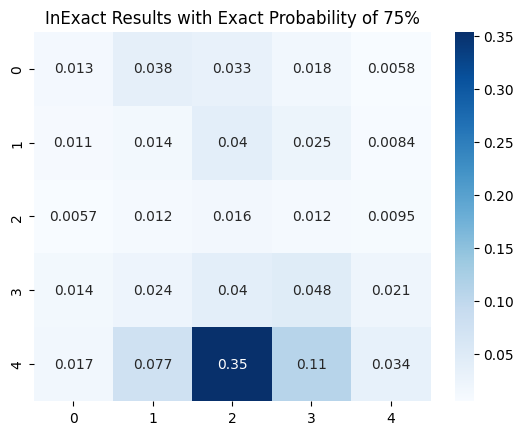

In [8]:
SensorIP = ['W','B','B','W','W','W','B','B','B','W','W','W','B','B','B','W']
Motion = ['R','R','D','L','D','R','R','R','D','D','L','U','L','L','D','R']
PR1 = p
for i in range(len(Motion)):
    PR1 = Sense(PR1, 0.6, 0.2, SensorIP[i])
    PR1 = MoveInExact(PR1,0.75,0.125,0.125, Motion[i])

for i in range(5):
    print(PR1[i])

sns.heatmap(PR1,cmap='Blues', annot=True)
plt.title('InExact Results with Exact Probability of 75%')
plt.show()

[1.659148267019637e-05, 0.01209519086657315, 5.5304942233987905e-06, 1.6591482670196374e-05, 1.6591482670196374e-05]
[0.00044797003209530207, 1.8434980744662641e-06, 0.0013439100962859053, 0.0004479700320953018, 1.6591482670196374e-05]
[1.6591482670196374e-05, 0.0004479700320953021, 0.00044797003209530207, 5.5304942233987955e-06, 0.00014932334403176736]
[0.0001493233440317673, 1.659148267019637e-05, 5.5304942233987905e-06, 0.004031730288857715, 5.530494223398791e-06]
[1.843498074466264e-06, 0.00044797003209530207, 0.9797104601924244, 0.00014932334403176733, 5.5304942233987905e-06]


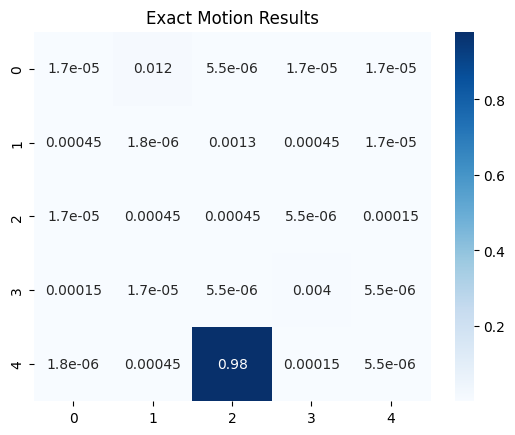

In [9]:
SensorIP = ['W','B','B','W','W','W','B','B','B','W','W','W','B','B','B','W']
Motion = ['R','R','D','L','D','R','R','R','D','D','L','U','L','L','D','R']
PR2 = p
for i in range(len(Motion)):
    PR2 = Sense(PR2, 0.6, 0.2, SensorIP[i])
    PR2 = MoveExact(PR2,Motion[i])

for i in range(5):
    print(PR2[i])

sns.heatmap(PR2,cmap='Blues', annot=True)
plt.title('Exact Motion Results')
plt.show()